## Creating a convolutional neural network for the MNIST dataset

In [10]:
# !pip install keras
# !pip install tensorflow

from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

ImportError: cannot import name 'to_categorical' from 'keras.utils' (/opt/anaconda3/lib/python3.7/site-packages/keras/utils/__init__.py)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Preprocessing

In [7]:
num_classes = 10

# Reshape and include the channel-size for CNN
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Since color ranges from 1 to 255, let's reduce that by dividing all through with 255 without loosing any information
X_train /= 255.0
X_test /= 255.0

# Change labels to categorical values
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Creating the model

In [9]:
cnn = Sequential()

# Convolution layer with 32 filters, 5x5 kernel
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu')) 

cnn.add(MaxPooling2D())

# Convolution layer with 64 filters, 5x5 kernel
cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))

cnn.add(MaxPooling2D())

cnn.add(Flatten())

cnn.add(Dense(1024, activation='relu'))

cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

print(cnn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3212288   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [11]:
history_cnn = cnn.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_train,y_train))

Epoch 1/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0990 - accuracy: 0.9689 - val_loss: 0.0308 - val_accuracy: 0.9903
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0152 - val_accuracy: 0.9951
Epoch 3/5
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.0114 - val_accuracy: 0.9963
Epoch 4/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0111 - val_accuracy: 0.9963
Epoch 5/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0094 - val_accuracy: 0.9970


AttributeError: 'History' object has no attribute 'history_cnn'

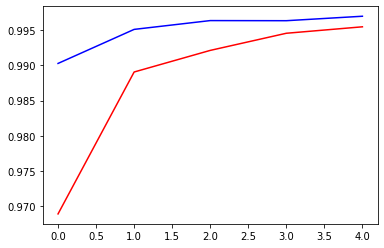

In [25]:
plt.plot(history_cnn.history['accuracy'], color = 'red')
plt.plot(history_cnn.history['val_accuracy'], color = 'blue')

In [19]:
cnn.save_weights("minst_weight")

In [20]:
score = cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0343 - accuracy: 0.9902


In [24]:
print(f'DNN accuracy is {score[1]}')

DNN accuracy is 0.9901999831199646
